In [1]:
#EDA Related to numeric_data and survey_data week one
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Data File Paths

numeric_data_path = '../data/original/covid_t1/numeric_data_t1.mat'
survey_data_path = '../data/original/covid_t1/survey_data_t1.mat'

numeric_data_csv = "../data/extra/output.csv"
survey_data_csv = "../data/csv/week1_csv/survey_data.csv"

# Load the .mat files
numeric_data_mat = loadmat(numeric_data_path)
survey_data_mat = loadmat(survey_data_path)

#Load the csv files
numeric_data_df = pd.read_csv(numeric_data_csv, header=None)
survey_data_df = pd.read_csv(survey_data_csv, header=None)

In [3]:
#Parse Headers
numeric_headers = []
survey_headers = []

for i in range(len(numeric_data_mat['numeric_data_headers'][0])):
    numeric_headers.append(numeric_data_mat['numeric_data_headers'][0][i][0])


for i in range(len(survey_data_mat['survey_data_headers'][0])):

    survey_headers.append(survey_data_mat['survey_data_headers'][0][i][0])
    

In [4]:

survey_data_df.columns = survey_headers
numeric_data_df.columns = numeric_headers

In [5]:
#EDA
print(numeric_data_df.isnull().sum())

prolific                  0
demographics_timestamp    0
age                       0
gender                    0
hit                       0
                         ..
su_crave8                 0
su_crave9                 0
su_crave10                0
su_crave11                0
su_complete               0
Length: 365, dtype: int64


In [6]:
print(numeric_data_df.describe())

               age       gender          hit     race___1     race___2  \
count  1462.000000  1462.000000  1462.000000  1462.000000  1462.000000   
mean     35.039672     1.508892     0.999316     0.017784     0.111491   
std      13.067657     0.535773     0.026153     0.132210     0.314847   
min      18.000000     1.000000     0.000000     0.000000     0.000000   
25%      25.000000     1.000000     1.000000     0.000000     0.000000   
50%      32.000000     1.000000     1.000000     0.000000     0.000000   
75%      43.000000     2.000000     1.000000     0.000000     0.000000   
max      77.000000     4.000000     1.000000     1.000000     1.000000   

          race___3     race___4     race___5     race___6     race___7  ...  \
count  1462.000000  1462.000000  1462.000000  1462.000000  1462.000000  ...   
mean      0.075239     0.089603     0.032832     0.004788     0.763338  ...   
std       0.263867     0.285710     0.178257     0.069053     0.425179  ...   
min       0.00000

In [7]:
#Filter for these columns and run EDA (Add in future: race, mental_health, substance use)? Where is income, marriage??
#Age, Gender, edu_level, job ---> sh_score (Happiness)

values_dictionary = {"gender": ["Man", "Woman", "Non-Binary", "Other"], "edu_level": ["1-8 Less than high school", "9-11 Some high school", "12 High school degree", "13-15 Some college", "16 Bachelor's degree in college (4-year)", "17-25 Graduate School"], "job": ["Working (paid employee)", "Working (self-employed)", "Not working (temporary layoff from a job", "Not working (looking for work)", "Not working (retired)", "Not working (disabled)", "Not working (other)", "Prefer not to answer"]}

numeric_data_df = numeric_data_df.filter(items=["age","gender", "edu_level", "job",  "stai_s_score", "sds_score"])
numeric_data_df.head(5)

,age,gender,edu_level,job,stai_s_score,sds_score
0,37,2,5,7,44,41
1,28,2,4,1,45,42
2,19,1,4,4,53,47
3,56,2,4,1,22,27
4,30,2,4,3,59,44


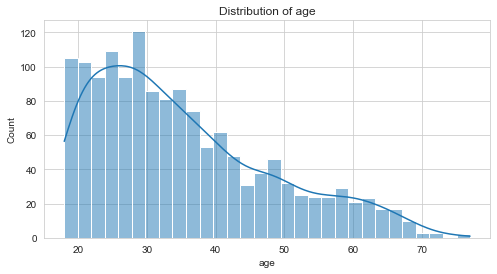

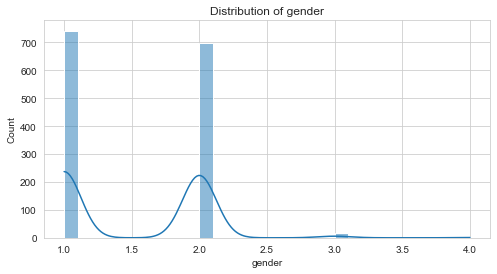

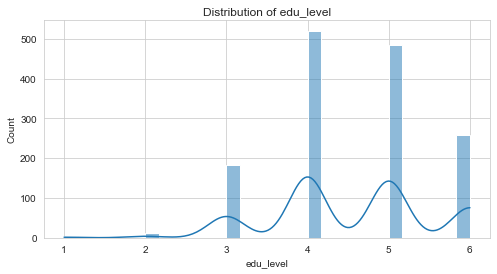

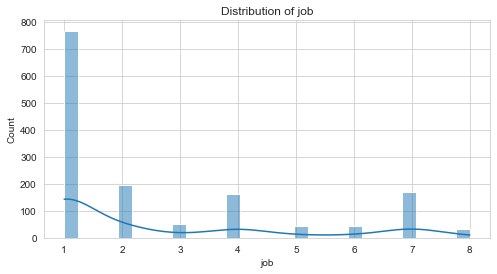

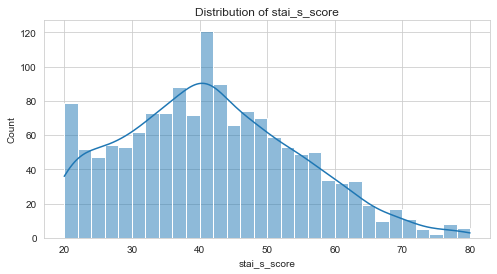

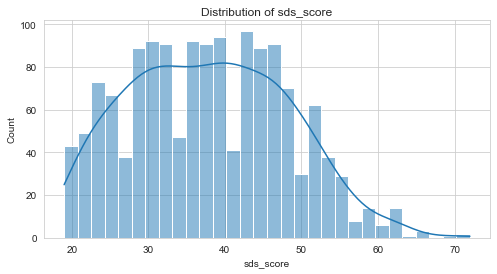

In [8]:
sns.set_style("whitegrid")

for feature in numeric_data_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_data_df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

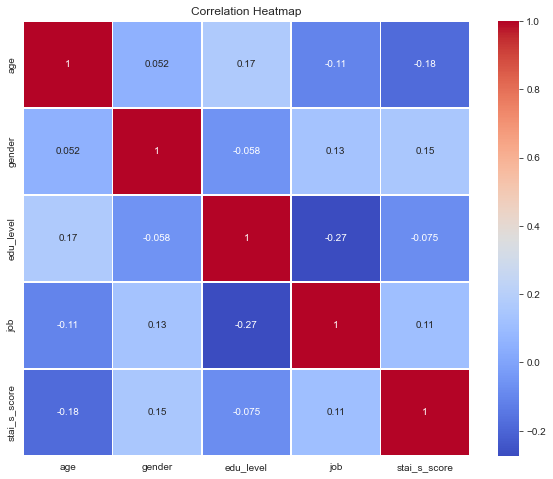

In [9]:
correlation_matrix = numeric_data_df[["age", "gender", "edu_level", "job", "stai_s_score"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

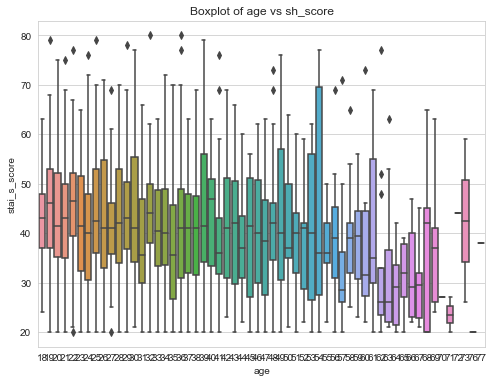

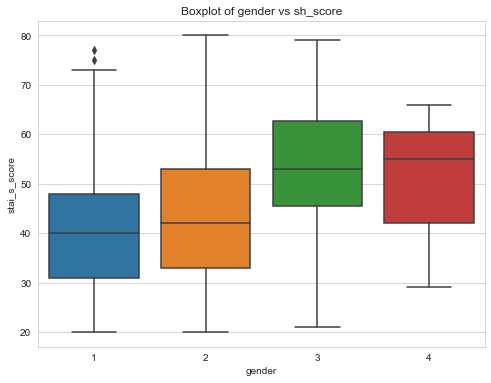

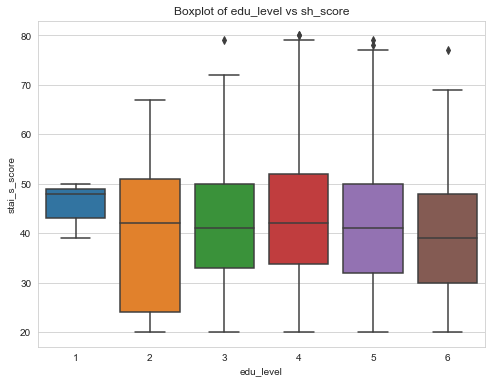

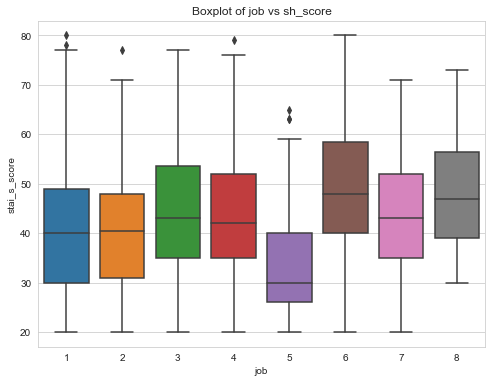

In [10]:
categorical_features = ["age", "gender", "edu_level", "job"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numeric_data_df[feature], y=numeric_data_df["stai_s_score"])
    plt.title(f"Boxplot of {feature} vs sh_score")
    plt.show()

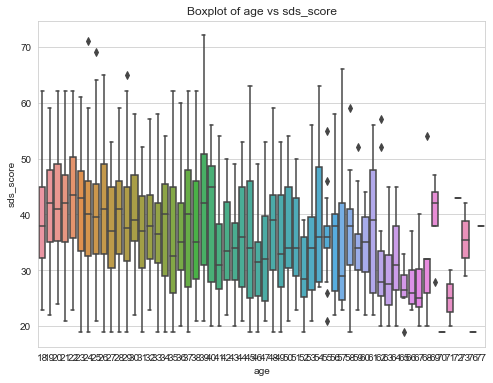

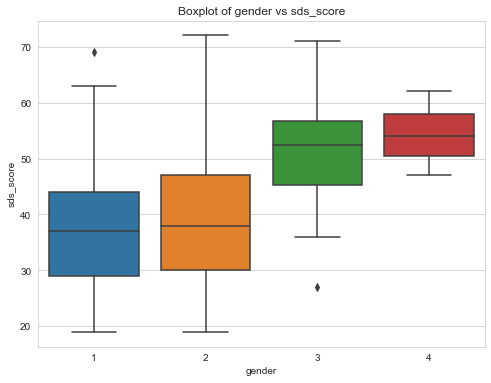

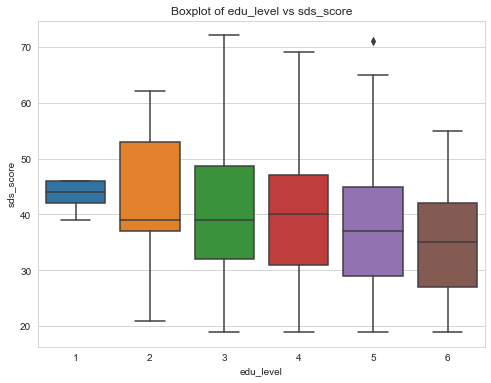

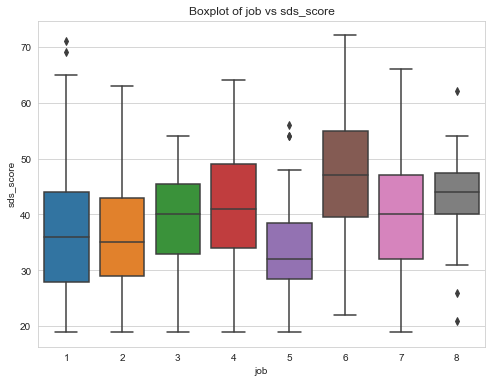

In [11]:
categorical_features = ["age", "gender", "edu_level", "job"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numeric_data_df[feature], y=numeric_data_df["sds_score"])
    plt.title(f"Boxplot of {feature} vs sds_score")
    plt.show()

In [12]:
#Findings


"""
Distributions of age on the lower end. Mostly people in the late 20's

Pretty even distribution between male and females.

Majority of people, attended/graduated college, and are currently in a job.


The stai_s_score is a normal distribution, peaking around 40.




The main row for the heat map is the bottom Row. Doesn't make sense to be comparing other categories.

Finally the box plot shows the breakdown shows the quartiles of stai_s_score based on each sub-category of the input variables.

"""

"\nDistributions of age on the lower end. Mostly people in the late 20's\n\nPretty even distribution between male and females.\n\nMajority of people, attended/graduated college, and are currently in a job.\n\n\nThe stai_s_score is a normal distribution, peaking around 40.\n\n\n\n\nThe main row for the heat map is the bottom Row. Doesn't make sense to be comparing other categories.\n\nFinally the box plot shows the breakdown shows the quartiles of stai_s_score based on each sub-category of the input variables.\n\n"

In [13]:
"""
EXPLORE SURVEY DATA
"""
print(len(survey_headers))
print(survey_headers)

389
['prolific', 'demographics_timestamp', 'age', 'sex', 'gender', 'hit', 'race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7', 'race___8', 'race_other', 'edu_level', 'marriage', 'handedness', 'covid_housed1', 'covid_housed2', 'covid_housed3', 'covid_housed4___1', 'covid_housed4___2', 'covid_housed4___3', 'covid_housed4___4', 'covid_housed5___1', 'covid_housed5___2', 'covid_housed5___3', 'covid_housed5___4', 'covid_housed6', 'covid_housed7', 'covid_housed8', 'covid_housed9', 'covid_housed10', 'polit_party', 'covid_sm1', 'job', 'job_other', 'occupation', 'income', 'ladder_us', 'religion', 'state', 'zip_code', 'adjust', 'adhd', 'autism', 'bipolar', 'avpd', 'bpd', 'mdd', 'ed', 'gad', 'ocd', 'ld', 'panic', 'gambling', 'ptsd', 'scz', 'spd', 'sad', 'tourettes', 'sud', 'other_disorder', 'covid_su2___1', 'covid_su2___2', 'covid_su2___3', 'covid_su2___4', 'covid_su2___5', 'covid_su2___6', 'covid_su2___7', 'covid_su2___8', 'covid_su2___9', 'covid_su2___10', 'covid_s

In [14]:
print(survey_data_df.head(5))

                   prolific demographics_timestamp  age  sex  gender  hit  \
0  546ec14dfdf99b2bc7ebd032            4/3/20 1:39   55    1       1    1   
1  54847013fdf99b0379939c8a            4/3/20 8:41   37    2       2    1   
2  548491acfdf99b0379939cc0            4/3/20 0:07   28    2       2    1   
3  54924b8efdf99b77ccedc1d5           4/2/20 23:32   19    1       1    1   
4  54e4be1bfdf99b5bad68f1a5           4/3/20 15:56   56    2       2    1   

   race___1  race___2  race___3  race___4  ...  su_crave3  su_crave4  \
0         0         1         0         0  ...          0          0   
1         0         0         0         0  ...          0          0   
2         0         0         0         0  ...          0          0   
3         0         1         0         0  ...          0          0   
4         0         0         0         0  ...          3          1   

   su_crave5  su_crave6 su_crave7  su_crave8  su_crave9  su_crave10  \
0          0          0         0

In [15]:
print(survey_data_df["covid_su2___11"])

0       0
1       0
2       0
3       0
4       0
       ..
1458    0
1459    0
1460    0
1461    0
1462    0
Name: covid_su2___11, Length: 1463, dtype: int64


In [16]:
print(survey_data_df['covid_pre9'])

0       0
1       0
2       0
3       0
4       0
       ..
1458    0
1459    0
1460    0
1461    0
1462    0
Name: covid_pre9, Length: 1463, dtype: int64
